In [94]:
import time
import pickle

import numpy as np
import random

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from utils import *
from q_learning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# Configurations
save_stats = True
save_figs = False
train = True
load = not train

seed = 0

## 2. Q-Learning

In [96]:
env = TictactoeEnv()

# Hyper-parameters
alpha = 0.05    # Learning rate
gamma = 0.99    # Discount factor
epsilon_opt = 0.5   # Optimal player's epsilon
num_episodes = 20000 # number of episodes
num_avg = 10 # training runs
test_freq = 250

### 2.1 Learning from experts

#### Question 1: Average reward with $\epsilon = 0.1$

************** RUN 1 OF 5 **************
M_opt = 0.0
M_rand = 0.84
RUN 1 took 51.7 seconds
************** RUN 2 OF 5 **************
M_opt = 0.0
M_rand = 0.836
RUN 2 took 46.7 seconds
************** RUN 3 OF 5 **************
M_opt = 0.0
M_rand = 0.826
RUN 3 took 48.0 seconds
************** RUN 4 OF 5 **************
M_opt = 0.0
M_rand = 0.79
RUN 4 took 50.8 seconds
************** RUN 5 OF 5 **************
M_opt = 0.0
M_rand = 0.884
RUN 5 took 50.2 seconds
epsilon_exploration_Q1 = 0.1 : 	M_opt =  0.0 	M_rand =  0.8352


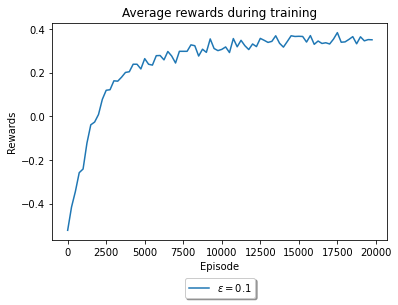

In [74]:
epsilon_exploration = 0.1
stats_dict_list = []
for i in range(num_avg):
    print('************** RUN', i+1, 'OF', num_avg, '**************')
    stats_dict = {}
    start = time.time()
    Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, verbose=False, against_opt=True)
    M_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    M_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    print("M_opt =", M_opt)
    print("M_rand =", M_rand)
    stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
    stats_dict_list.append(stats_dict)
    print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')

plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q1', '\epsilon', save=save_figs, keys = ['rewards'])

#### Questions 2 and 3: Decreasing exploration for different values of $n^{*}$

In [19]:
test_freq = 250
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [20]:
vec_n_star_first = vec_n_star[:10]
var_name = 'nstar_first'
q_learning_params_list = []
for n_star in vec_n_star_first:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [21]:
if train:
    stats_dict_nstar_first_list = train_avg(var_name, vec_n_star_first, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [22]:
var_name = 'nstar_second'
vec_n_star_second = vec_n_star[10:]
q_learning_params_list = []
for n_star in vec_n_star_second:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [23]:
if train:
    stats_dict_nstar_second_list = train_avg(var_name, vec_n_star_second, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [24]:
# Merge
if save_stats:
    stats_dict_nstar_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_first_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_first_list = pickle.load(handle)
    fname = output_folder + '/stats_dict_nstar_second_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_second_list = pickle.load(handle)
        for i in range(len(stats_dict_nstar_second_list)):
            stats_dict_nstar_list.append({**stats_dict_nstar_first_list[i], **stats_dict_nstar_second_list[i]})
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.878
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.872
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.854
n_star = 40000 : 	M_opt =  0.0 	M_rand =  0.874


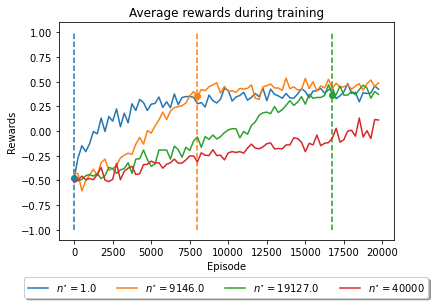

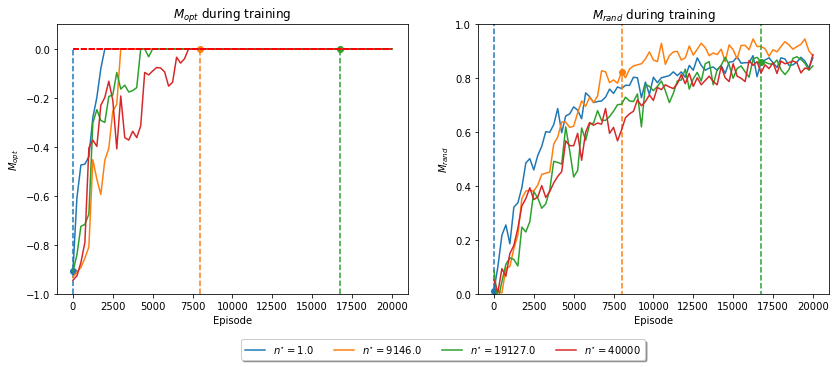

In [25]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

plot_n_star = [1., 9146., 19127., 40000]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star', "n^{\star}", save=save_figs, decaying_exploration=True)

##### Plot for all the experimented values

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.878
n_star = 100.0 : 	M_opt =  0.0 	M_rand =  0.81
n_star = 500.0 : 	M_opt =  0.0 	M_rand =  0.84
n_star = 750.0 : 	M_opt =  0.0 	M_rand =  0.854
n_star = 1000.0 : 	M_opt =  0.0 	M_rand =  0.868
n_star = 1279.0 : 	M_opt =  0.0 	M_rand =  0.85
n_star = 1635.0 : 	M_opt =  0.0 	M_rand =  0.874
n_star = 2091.0 : 	M_opt =  0.0 	M_rand =  0.842
n_star = 2674.0 : 	M_opt =  0.0 	M_rand =  0.888
n_star = 3420.0 : 	M_opt =  0.0 	M_rand =  0.898
n_star = 4373.0 : 	M_opt =  0.0 	M_rand =  0.852
n_star = 5593.0 : 	M_opt =  0.0 	M_rand =  0.846
n_star = 7152.0 : 	M_opt =  0.0 	M_rand =  0.824
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.872
n_star = 11696.0 : 	M_opt =  0.0 	M_rand =  0.812
n_star = 14957.0 : 	M_opt =  0.0 	M_rand =  0.88
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.854
n_star = 24460.0 : 	M_opt =  0.0 	M_rand =  0.826
n_star = 31279.0 : 	M_opt =  0.0 	M_rand =  0.86
n_star = 40000.0 : 	M_opt =  0.0 	M_rand =  0.874


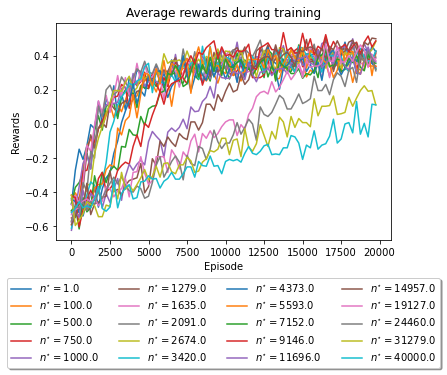

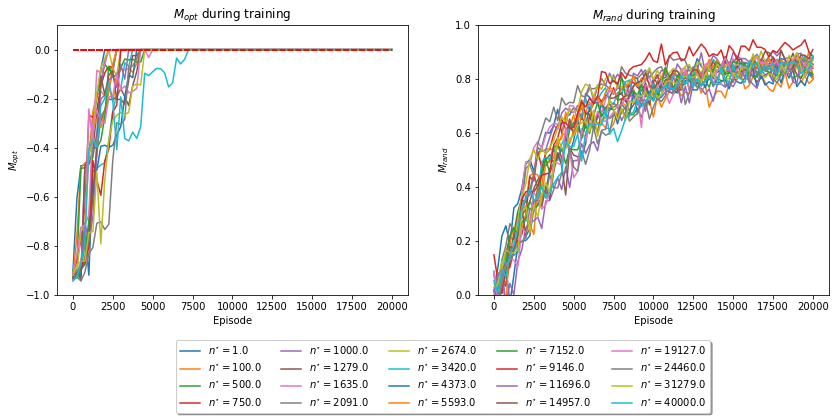

In [26]:
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star', "n^{\star}", save=False)

#### Questions 4: Good experts and bad experts

In [27]:
n_star = 1 # we pick the best according to previous experiments
M = 11
var_name = 'epsilon_opt'
vec_epsilon_opt = np.round(np.linspace(0, 1, M), decimals=2)
q_learning_params_list = []
for epsilon_opt in vec_epsilon_opt:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': 250,
              'epsilon_opt': epsilon_opt,
              'against_opt': True}
    q_learning_params_list.append(params)

In [28]:
if train:
    stats_dict_eps_opt_list = train_avg(var_name, vec_epsilon_opt, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.09
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.664
epsilon_opt = 0.5 : 	M_opt =  0.0 	M_rand =  0.818
epsilon_opt = 0.8 : 	M_opt =  -0.112 	M_rand =  0.852
epsilon_opt = 1.0 : 	M_opt =  -0.286 	M_rand =  0.896


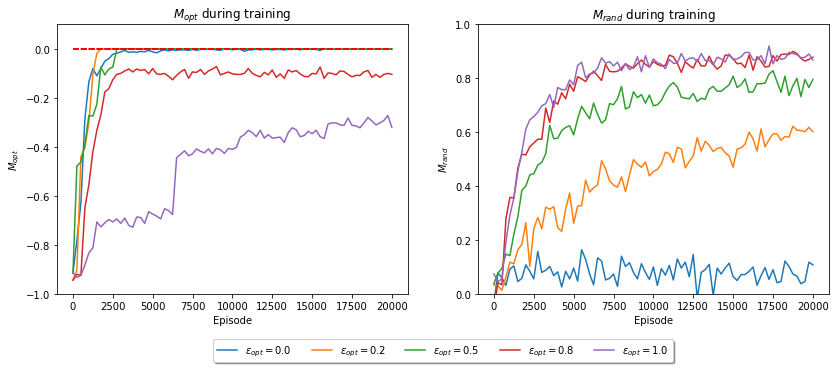

In [29]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_epsilon_opt_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_opt_list = pickle.load(handle)

plot_epsilon_opt = [0., 0.2, 0.5, 0.8, 1.]
plot_stats(stats_dict_eps_opt_list, plot_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=save_figs, keys=['test_Mopt', 'test_Mrand'])

##### Plot for all the experimented values

In [ ]:
plot_stats(stats_dict_eps_opt_list, vec_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 5: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
np.random.seed(seed)
random.seed(seed)
# Setting hyperparams
n_star = 1
epsilon_min = 0.1
epsilon_max = 0.8
# Training
Q, stats = q_learning(env, num_episodes=20000, epsilon_exploration_rule=return_lambda_explor(epsilon_min, epsilon_max, n_star), verbose=False, epsilon_opt=0.5, against_opt=True)
# Measuring performance
m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
print("M_opt = ", m_opt)
m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
print("M_rand = ", m_rand)

### 2.2 Learning by self-practice

#### Question 7: Self-learning with constant rate of exploration $\epsilon$

In [99]:
epsilon_vec = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
var_name = 'eps_self'
q_learning_params_list = []
for eps in epsilon_vec:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration': eps,
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [100]:
if train:
    stats_dict_eps_self_list = train_avg(var_name, epsilon_vec, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

************** RUN 1 OF 10 **************
------------- Training with eps_self = 0.0 -------------
M_opt = -0.93
M_rand = 0.184
Training with eps_self = 0.0  took: 00h02m01s 


------------- Training with eps_self = 0.1 -------------
M_opt = -0.266
M_rand = 0.712
Training with eps_self = 0.1  took: 00h02m06s 


------------- Training with eps_self = 0.2 -------------
M_opt = -0.308
M_rand = 0.71
Training with eps_self = 0.2  took: 00h02m09s 


------------- Training with eps_self = 0.3 -------------
M_opt = -0.072
M_rand = 0.82
Training with eps_self = 0.3  took: 00h02m10s 


------------- Training with eps_self = 0.4 -------------
M_opt = -0.258
M_rand = 0.934
Training with eps_self = 0.4  took: 00h02m06s 


------------- Training with eps_self = 0.5 -------------
M_opt = -0.098
M_rand = 0.898
Training with eps_self = 0.5  took: 00h02m06s 


------------- Training with eps_self = 0.6 -------------
M_opt = -0.34
M_rand = 0.888
Training with eps_self = 0.6  took: 00h02m04s 


----------

M_opt = -0.208
M_rand = 0.914
Training with eps_self = 0.9  took: 00h02m05s 


************** RUN 7 OF 10 **************
------------- Training with eps_self = 0.0 -------------
M_opt = -0.91
M_rand = 0.154
Training with eps_self = 0.0  took: 00h02m10s 


------------- Training with eps_self = 0.1 -------------
M_opt = -0.204
M_rand = 0.644
Training with eps_self = 0.1  took: 00h02m15s 


------------- Training with eps_self = 0.2 -------------
M_opt = -0.264
M_rand = 0.726
Training with eps_self = 0.2  took: 00h02m07s 


------------- Training with eps_self = 0.3 -------------
M_opt = -0.17
M_rand = 0.802
Training with eps_self = 0.3  took: 00h02m09s 


------------- Training with eps_self = 0.4 -------------
M_opt = -0.406
M_rand = 0.818
Training with eps_self = 0.4  took: 00h02m10s 


------------- Training with eps_self = 0.5 -------------
M_opt = -0.45
M_rand = 0.894
Training with eps_self = 0.5  took: 00h02m07s 


------------- Training with eps_self = 0.6 -------------
M_opt = 0

epsilon_self = 0 : 	M_opt =  -0.8886000000000001 	M_rand =  0.1948
epsilon_self = 0.3 : 	M_opt =  -0.12140000000000002 	M_rand =  0.8480000000000001
epsilon_self = 0.5 : 	M_opt =  -0.1506 	M_rand =  0.8948
epsilon_self = 0.7 : 	M_opt =  -0.2098 	M_rand =  0.9084


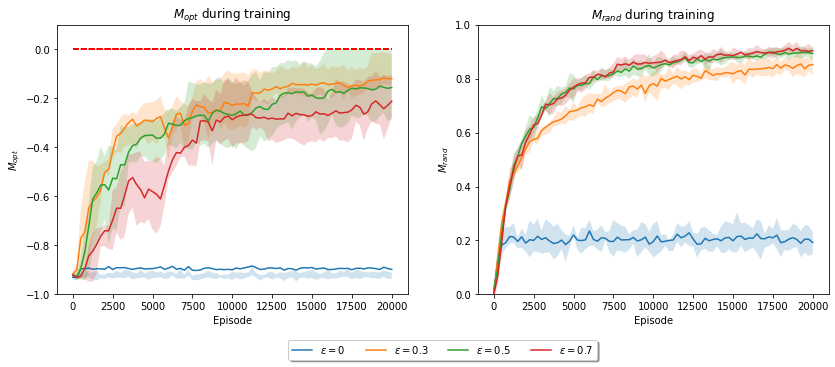

In [105]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_eps_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_self_list = pickle.load(handle)

epsilon_vec_plot = [0, 0.3, 0.5, 0.7] # are these okay?
plot_stats(stats_dict_eps_self_list, epsilon_vec_plot, "epsilon_self", "\epsilon", save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

##### Plot for all the experimented values

epsilon_self = 0.0 : 	M_opt =  -0.8886000000000001 	M_rand =  0.1948
epsilon_self = 0.1 : 	M_opt =  -0.38820000000000005 	M_rand =  0.6476
epsilon_self = 0.2 : 	M_opt =  -0.2958 	M_rand =  0.7587999999999999
epsilon_self = 0.3 : 	M_opt =  -0.12140000000000002 	M_rand =  0.8480000000000001
epsilon_self = 0.4 : 	M_opt =  -0.203 	M_rand =  0.8630000000000001
epsilon_self = 0.5 : 	M_opt =  -0.1506 	M_rand =  0.8948
epsilon_self = 0.6 : 	M_opt =  -0.11620000000000001 	M_rand =  0.9166000000000001
epsilon_self = 0.7 : 	M_opt =  -0.2098 	M_rand =  0.9084
epsilon_self = 0.8 : 	M_opt =  -0.197 	M_rand =  0.907
epsilon_self = 0.9 : 	M_opt =  -0.27159999999999995 	M_rand =  0.899


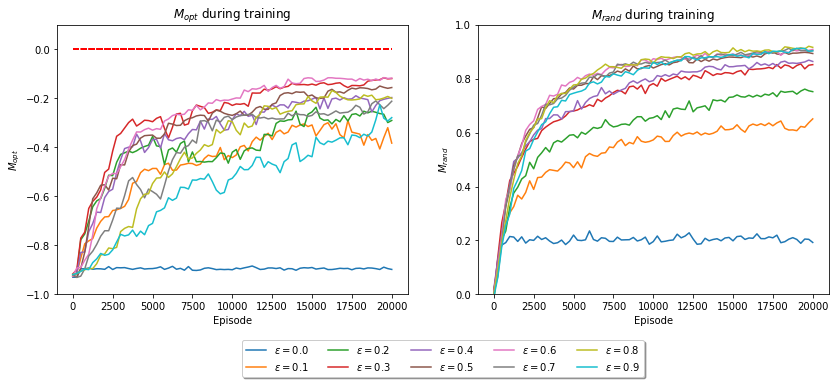

In [103]:
plot_stats(stats_dict_eps_self_list, epsilon_vec, "epsilon_self", "\epsilon", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 8: Decaying exploration rule for different values of $n^*$

In [48]:
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [45]:
var_name = 'nstar_first_self'
vec_n_star_first = vec_n_star[:10]
q_learning_params_list = []
for n_star in vec_n_star_first:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [47]:
if train:
    stats_dict_nstar_self_first_list = train_avg(var_name, vec_n_star_first, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

************** RUN 1 OF 1 **************
------------- Training with nstar_first_self = 1.0 -------------


KeyboardInterrupt: 

In [49]:
var_name = 'nstar_second_self'
vec_n_star_second = vec_n_star[10:]
q_learning_params_list = []
for n_star in vec_n_star_second:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': (return_lambda_explor(epsilon_min, epsilon_max, n_star)),
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [50]:
if train:
    stats_dict_nstar_test = train_avg(var_name, vec_n_star_second, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

************** RUN 1 OF 1 **************
------------- Training with nstar_second_self = 4373.0 -------------
M_opt = -0.268
M_rand = 0.774
Training with nstar_second_self = 4373.0  took: 00h03m16s 


------------- Training with nstar_second_self = 5593.0 -------------
M_opt = -0.16
M_rand = 0.78
Training with nstar_second_self = 5593.0  took: 00h03m26s 


------------- Training with nstar_second_self = 7152.0 -------------
M_opt = -0.166
M_rand = 0.766
Training with nstar_second_self = 7152.0  took: 00h03m10s 


------------- Training with nstar_second_self = 9146.0 -------------
M_opt = -0.086
M_rand = 0.734
Training with nstar_second_self = 9146.0  took: 00h03m14s 


------------- Training with nstar_second_self = 11696.0 -------------
M_opt = 0.0
M_rand = 0.808
Training with nstar_second_self = 11696.0  took: 00h03m20s 


------------- Training with nstar_second_self = 14957.0 -------------
M_opt = 0.0
M_rand = 0.782
Training with nstar_second_self = 14957.0  took: 00h03m26s 


---

In [51]:
# Merge
if save_stats:
    stats_dict_nstar_self_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_first_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_first_self_list = pickle.load(handle)
    fname = output_folder + '/stats_dict_nstar_second_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_second_self_list = pickle.load(handle)
        for i in range(len(stats_dict_nstar_second_self_list)):
            stats_dict_nstar_self_list.append({**stats_dict_nstar_first_self_list[i], **stats_dict_nstar_second_self_list[i]})
    fname = output_folder + '/stats_dict_nstar_self_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_self_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

n_star_self = 1.0 : 	M_opt =  -0.232 	M_rand =  0.73
n_star_self = 100.0 : 	M_opt =  -0.208 	M_rand =  0.678
n_star_self = 1000.0 : 	M_opt =  -0.374 	M_rand =  0.594
n_star_self = 31279.0 : 	M_opt =  -0.146 	M_rand =  0.89
n_star_self = 40000.0 : 	M_opt =  -0.084 	M_rand =  0.896


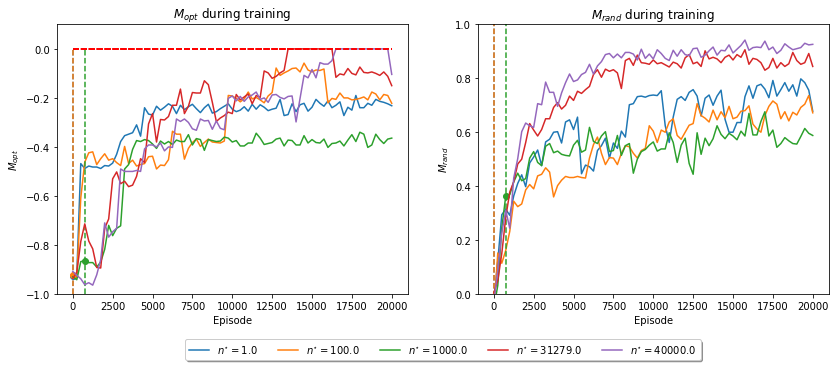

In [54]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_self_list = pickle.load(handle)

plot_n_star = [1., 100., 1000., 31279., 40000.]
plot_stats(stats_dict_nstar_self_list, plot_n_star, 'n_star_self', "n^{\star}", decaying_exploration=True, save=save_figs, keys=['test_Mopt', 'test_Mrand'])

##### Plot for all the experimented values

n_star_self = 1.0 : 	M_opt =  -0.232 	M_rand =  0.73
n_star_self = 100.0 : 	M_opt =  -0.208 	M_rand =  0.678
n_star_self = 500.0 : 	M_opt =  -0.242 	M_rand =  0.694
n_star_self = 750.0 : 	M_opt =  -0.658 	M_rand =  0.538
n_star_self = 1000.0 : 	M_opt =  -0.374 	M_rand =  0.594
n_star_self = 1279.0 : 	M_opt =  -0.418 	M_rand =  0.596
n_star_self = 1635.0 : 	M_opt =  -0.862 	M_rand =  0.644
n_star_self = 2091.0 : 	M_opt =  -0.104 	M_rand =  0.714
n_star_self = 2674.0 : 	M_opt =  -0.308 	M_rand =  0.71
n_star_self = 3420.0 : 	M_opt =  -0.214 	M_rand =  0.784
n_star_self = 4373.0 : 	M_opt =  -0.268 	M_rand =  0.774
n_star_self = 5593.0 : 	M_opt =  -0.16 	M_rand =  0.78
n_star_self = 7152.0 : 	M_opt =  -0.166 	M_rand =  0.766
n_star_self = 9146.0 : 	M_opt =  -0.086 	M_rand =  0.734
n_star_self = 11696.0 : 	M_opt =  0.0 	M_rand =  0.808
n_star_self = 14957.0 : 	M_opt =  0.0 	M_rand =  0.782
n_star_self = 19127.0 : 	M_opt =  0.0 	M_rand =  0.918
n_star_self = 24460.0 : 	M_opt =  0.0 	M_rand =

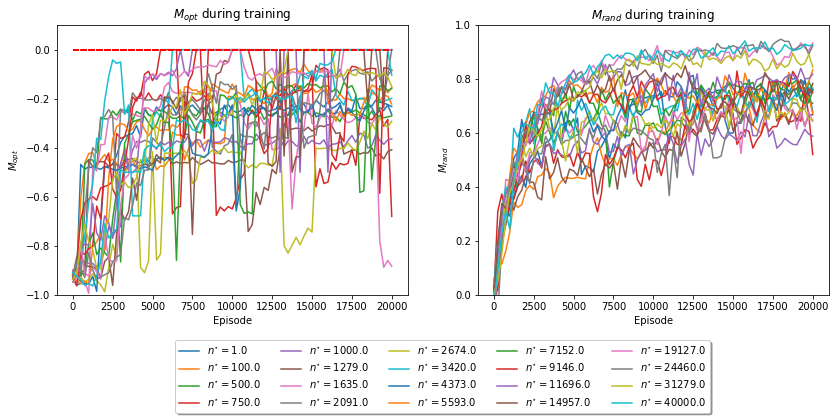

In [55]:
plot_stats(stats_dict_nstar_self_list, vec_n_star, 'n_star_self', "n^{\star}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [78]:
# np.random.seed(seed)
# random.seed(seed)
# Setting hyperparams
n_star = 1000
epsilon_min = 0.1
epsilon_max = 0.8
# Training
Q, stats = q_learning(env, num_episodes=20000, epsilon_exploration=0.5, verbose=True, test_freq=250, self_practice=True)
# Measuring performance
m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
print("M_opt = ", m_opt)
m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
print("M_rand = ", m_rand)

Episode  0 :	M_opt =  -0.916 	M_rand =  0.002
Episode  250 :	M_opt =  -0.944 	M_rand =  0.078
Episode  500 :	M_opt =  -0.938 	M_rand =  0.194
Episode  750 :	M_opt =  -0.916 	M_rand =  0.264
Episode  1000 :	M_opt =  -0.912 	M_rand =  0.37
Episode  1250 :	M_opt =  -0.714 	M_rand =  0.422
Episode  1500 :	M_opt =  -0.732 	M_rand =  0.434
Episode  1750 :	M_opt =  -0.462 	M_rand =  0.502
Episode  2000 :	M_opt =  -0.462 	M_rand =  0.564
Episode  2250 :	M_opt =  -0.442 	M_rand =  0.506
Episode  2500 :	M_opt =  -0.456 	M_rand =  0.618
Episode  2750 :	M_opt =  -0.48 	M_rand =  0.616
Episode  3000 :	M_opt =  -0.498 	M_rand =  0.618
Episode  3250 :	M_opt =  -0.498 	M_rand =  0.57
Episode  3500 :	M_opt =  -0.438 	M_rand =  0.66
Episode  3750 :	M_opt =  -0.386 	M_rand =  0.708
Episode  4000 :	M_opt =  -0.298 	M_rand =  0.69
Episode  4250 :	M_opt =  -0.312 	M_rand =  0.736
Episode  4500 :	M_opt =  -0.278 	M_rand =  0.744
Episode  4750 :	M_opt =  -0.282 	M_rand =  0.74
Episode  5000 :	M_opt =  -0.304 

In [85]:
epsilon_exploration = 0.2
stats_dict_list = []
for i in range(num_avg):
    print('************** RUN', i+1, 'OF', num_avg, '**************')
    stats_dict = {}
    start = time.time()
    Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, 
                          test_freq=250, verbose=True, self_practice=True)
    M_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    M_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    print("M_opt =", M_opt)
    print("M_rand =", M_rand)
    stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
    stats_dict_list.append(stats_dict)
    print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')

************** RUN 1 OF 5 **************
Episode  0 :	M_opt =  -0.936 	M_rand =  0.012
Episode  250 :	M_opt =  -0.944 	M_rand =  0.186
Episode  500 :	M_opt =  -0.928 	M_rand =  0.268
Episode  750 :	M_opt =  -0.976 	M_rand =  0.268
Episode  1000 :	M_opt =  -0.99 	M_rand =  0.35
Episode  1250 :	M_opt =  -0.988 	M_rand =  0.372
Episode  1500 :	M_opt =  -0.98 	M_rand =  0.38
Episode  1750 :	M_opt =  -0.992 	M_rand =  0.482
Episode  2000 :	M_opt =  -1.0 	M_rand =  0.416
Episode  2250 :	M_opt =  -0.988 	M_rand =  0.458
Episode  2500 :	M_opt =  -0.992 	M_rand =  0.408
Episode  2750 :	M_opt =  -0.99 	M_rand =  0.454
Episode  3000 :	M_opt =  -1.0 	M_rand =  0.462
Episode  3250 :	M_opt =  -0.5 	M_rand =  0.428
Episode  3500 :	M_opt =  -0.5 	M_rand =  0.428
Episode  3750 :	M_opt =  -0.5 	M_rand =  0.46
Episode  4000 :	M_opt =  -0.5 	M_rand =  0.408
Episode  4250 :	M_opt =  -0.5 	M_rand =  0.514
Episode  4500 :	M_opt =  -0.5 	M_rand =  0.464
Episode  4750 :	M_opt =  -0.5 	M_rand =  0.478
Episode  

Episode  500 :	M_opt =  -0.954 	M_rand =  0.236
Episode  750 :	M_opt =  -0.952 	M_rand =  0.288
Episode  1000 :	M_opt =  -0.964 	M_rand =  0.324
Episode  1250 :	M_opt =  -0.988 	M_rand =  0.38
Episode  1500 :	M_opt =  -0.998 	M_rand =  0.354
Episode  1750 :	M_opt =  -0.986 	M_rand =  0.418
Episode  2000 :	M_opt =  -0.726 	M_rand =  0.436
Episode  2250 :	M_opt =  -0.734 	M_rand =  0.498
Episode  2500 :	M_opt =  -0.748 	M_rand =  0.578
Episode  2750 :	M_opt =  -0.498 	M_rand =  0.44
Episode  3000 :	M_opt =  -0.492 	M_rand =  0.504
Episode  3250 :	M_opt =  -0.492 	M_rand =  0.526
Episode  3500 :	M_opt =  -0.496 	M_rand =  0.51
Episode  3750 :	M_opt =  -0.5 	M_rand =  0.526
Episode  4000 :	M_opt =  -0.496 	M_rand =  0.53
Episode  4250 :	M_opt =  -0.47 	M_rand =  0.562
Episode  4500 :	M_opt =  -0.444 	M_rand =  0.556
Episode  4750 :	M_opt =  -0.448 	M_rand =  0.574
Episode  5000 :	M_opt =  -0.434 	M_rand =  0.526
Episode  5250 :	M_opt =  -0.434 	M_rand =  0.54
Episode  5500 :	M_opt =  -0.42

Episode  1000 :	M_opt =  -0.426 	M_rand =  0.514
Episode  1250 :	M_opt =  -0.42 	M_rand =  0.534
Episode  1500 :	M_opt =  -0.424 	M_rand =  0.566
Episode  1750 :	M_opt =  -0.408 	M_rand =  0.584
Episode  2000 :	M_opt =  -0.414 	M_rand =  0.586
Episode  2250 :	M_opt =  -0.412 	M_rand =  0.586
Episode  2500 :	M_opt =  -0.45 	M_rand =  0.72
Episode  2750 :	M_opt =  -0.44 	M_rand =  0.596
Episode  3000 :	M_opt =  -0.344 	M_rand =  0.668
Episode  3250 :	M_opt =  -0.36 	M_rand =  0.66
Episode  3500 :	M_opt =  -0.348 	M_rand =  0.69
Episode  3750 :	M_opt =  -0.364 	M_rand =  0.664
Episode  4000 :	M_opt =  -0.372 	M_rand =  0.684
Episode  4250 :	M_opt =  -0.364 	M_rand =  0.676
Episode  4500 :	M_opt =  -0.37 	M_rand =  0.676
Episode  4750 :	M_opt =  -0.382 	M_rand =  0.624
Episode  5000 :	M_opt =  -0.364 	M_rand =  0.63
Episode  5250 :	M_opt =  -0.356 	M_rand =  0.642
Episode  5500 :	M_opt =  -0.28 	M_rand =  0.728
Episode  5750 :	M_opt =  -0.252 	M_rand =  0.684
Episode  6000 :	M_opt =  -0.24

epsilon_exploration_Q7 = 0.2 : 	M_opt =  -0.3088 	M_rand =  0.7644


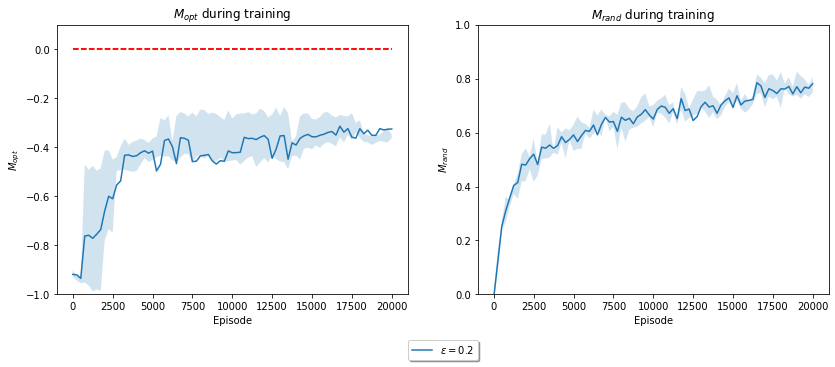

In [86]:
plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q7', '\epsilon', save=save_figs, keys = ['test_Mopt', 'test_Mrand'], perc=True)

#### Question 10: Heatmaps of the Q-values in 3 significant states

In [75]:
# Parametri ottimali di Q
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 20000
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)
Q, stats = q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, num_episodes=20000, verbose=True, self_practice=True)

C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 5 rows containing missing values.


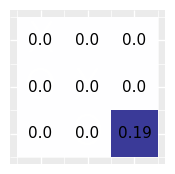

C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 5 rows containing missing values.


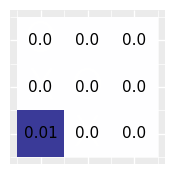

C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 7 rows containing missing values.


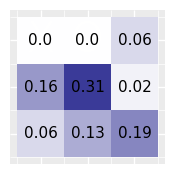

In [76]:
grids = [[1., 0., 0., -1., 1., 0., 0., -1., 0.], [-1., 0., 0., 1., -1., 0., 0., 1., 0.], [1., -1., 0., 0., 0., 0., 0., 0., 0.]]
heatmaps_subplots(grids, Q, save=save_figs)

## Deep Q-Learning